In [1]:
!unzip bloodcancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: Original/Pre/WBC-Malignant-Pre-024.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-025.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-026.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-027.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-028.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-029.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-030.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-031.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-032.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-033.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-034.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-035.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-036.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-037.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-038.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-039.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-040.jpg  
  inflating: Original/Pre/WBC-M

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')


In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.regularizers import l2

In [4]:
dataset_dir = '/content/Original'
class_names =  ['Benign', 'Early', 'Pre', 'Pro']

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)
dataset_dir = '/content/Segmented'
class_names = ['Benign', 'Early', 'Pre', 'Pro']

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)
images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)

In [5]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}
numerical_labels = np.array([label_mapping[label] for label in labels])
categorical_labels = to_categorical(numerical_labels)
X_train, X_test, y_train, y_test = train_test_split(images, categorical_labels, test_size=0.2, random_state=42)


In [6]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)




In [7]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 292s 4s/step - accuracy: 0.6208 - loss: 102.2453 - val_accuracy: 0.8267 - val_loss: 0.4820
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.8957 - loss: 0.3177 - val_accuracy: 0.8482 - val_loss: 0.4784
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.9260 - loss: 0.1955 - val_accuracy: 0.8681 - val_loss: 0.4388
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step - accuracy: 0.9729 - loss: 0.0790 - val_accuracy: 0.8528 - val_loss: 0.6270
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.9760 - loss: 0.0816 - val_accuracy: 0.8604 - val_loss: 0.6193
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.9809 - loss: 0.0565 - val_accuracy: 0.8344 - val_loss: 0.7608
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9932 - loss: 0.0351 - val_accuracy: 0.8528 - val_loss: 0.8820
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9418 - loss: 0.2641 - val_accuracy: 0.8160 -

In [8]:


model.save('blood_cancer_model.h5')

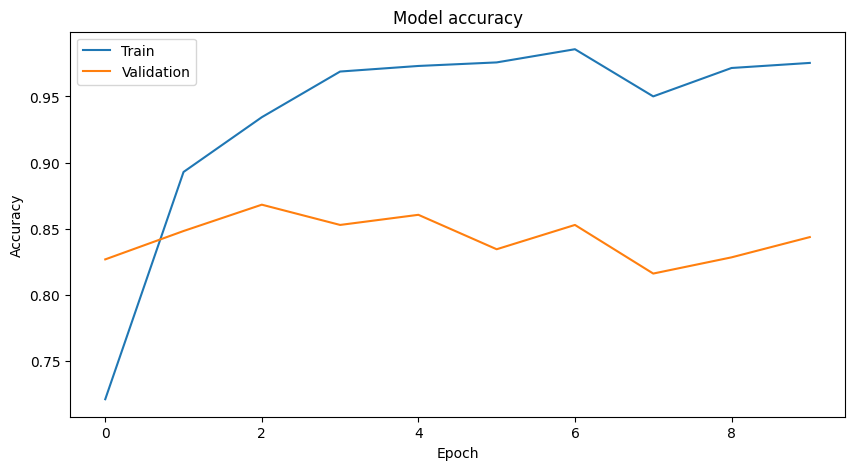

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
# prompt: give all the metrics like accuracy,precision,recall,f1-score in percentage

from sklearn.metrics import classification_report

# Assuming y_pred contains your model's predictions for X_test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)

# Extract metrics and print them as percentages
for class_name in class_names:
    print(f"Metrics for class {class_name}:")
    print(f"  Precision: {report[class_name]['precision'] * 100:.2f}%")
    print(f"  Recall: {report[class_name]['recall'] * 100:.2f}%")
    print(f"  F1-score: {report[class_name]['f1-score'] * 100:.2f}%")

print(f"\nOverall Metrics:")
print(f"Accuracy: {report['accuracy'] * 100:.2f}%")
print(f"Macro Avg Precision: {report['macro avg']['precision'] * 100:.2f}%")
print(f"Macro Avg Recall: {report['macro avg']['recall'] * 100:.2f}%")
print(f"Macro Avg F1-score: {report['macro avg']['f1-score'] * 100:.2f}%")
print(f"Weighted Avg Precision: {report['weighted avg']['precision'] * 100:.2f}%")
print(f"Weighted Avg Recall: {report['weighted avg']['recall'] * 100:.2f}%")
print(f"Weighted Avg F1-score: {report['weighted avg']['f1-score'] * 100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
Metrics for class Benign:
  Precision: 78.50%
  Recall: 67.74%
  F1-score: 72.73%
Metrics for class Early:
  Precision: 79.72%
  Recall: 88.27%
  F1-score: 83.78%
Metrics for class Pre:
  Precision: 85.47%
  Recall: 80.77%
  F1-score: 83.05%
Metrics for class Pro:
  Precision: 93.59%
  Recall: 97.33%
  F1-score: 95.42%

Overall Metrics:
Accuracy: 84.36%
Macro Avg Precision: 84.32%
Macro Avg Recall: 83.53%
Macro Avg F1-score: 83.75%
Weighted Avg Precision: 84.28%
Weighted Avg Recall: 84.36%
Weighted Avg F1-score: 84.15%


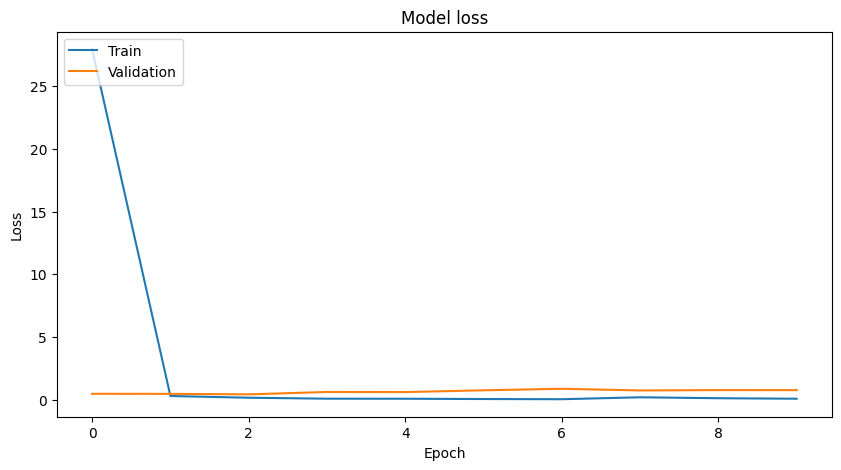

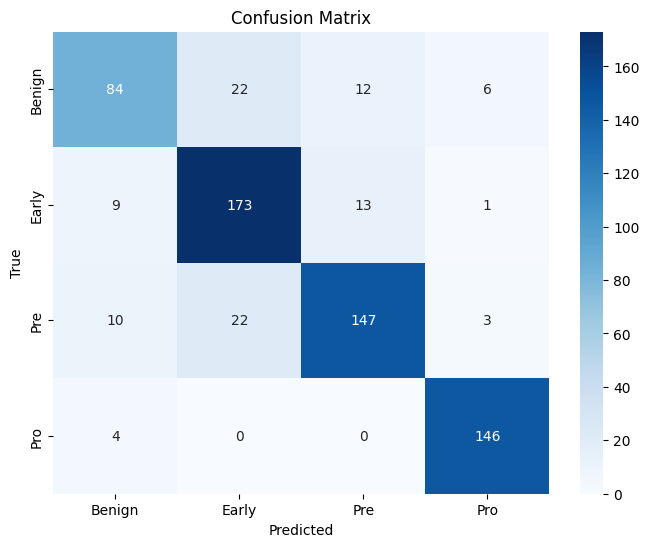

In [11]:
# prompt: plot the graphs based on the metrics

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 788ms/step
Accuracy: 0.843558282208589
Precision: 0.8428450704312497
Recall: 0.843558282208589
F1-score: 0.8415260817287865


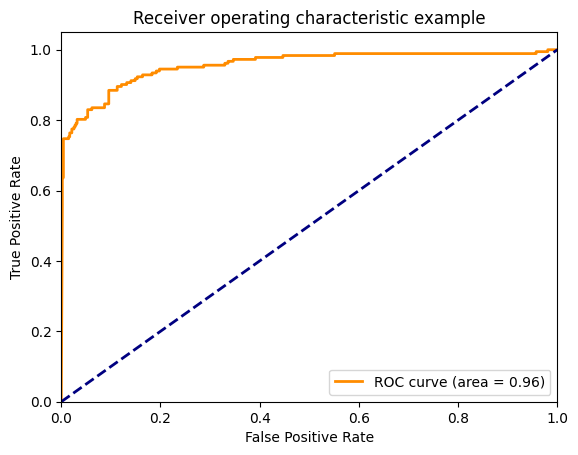

In [12]:
# prompt: Once the model is finalized, evaluate its performance on the test set using metrics like accuracy, precision, recall, F1-score, and AUC-ROC curve.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import label_binarize

# Assuming 'model' and 'X_test', 'y_test' are defined from previous code
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
y_true = np.argmax(y_test, axis = 1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted') # Use weighted for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


# Binarize the output for ROC AUC
y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))
n_classes = y_true_binarized.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = roc_auc_score(y_true_binarized[:, i], y_pred_probabilities[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_pred_probabilities.ravel())
roc_auc["micro"] = roc_auc_score(y_true_binarized, y_pred_probabilities, average="micro")

#Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'images' and 'numerical_labels' are defined from the previous code
X_train, X_test, y_train, y_test = train_test_split(images, numerical_labels, test_size=0.2, random_state=42)

# Flatten the images for the classifiers
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(classification_report(y_test, y_pred))
    return accuracy, precision, recall, f1


classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    accuracy, precision, recall, f1 = evaluate_classifier(clf, X_train_flat, y_train, X_test_flat, y_test)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}


# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(results.keys()), y=[results[clf][metric] for clf in results])
    plt.title(f'{metric} Comparison')
    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.show()

Evaluating Random Forest...
              precision    recall  f1-score   support

           0       0.65      0.10      0.18       124
           1       0.72      0.88      0.79       196
           2       0.75      0.87      0.80       182
           3       0.81      0.97      0.88       150

    accuracy                           0.75       652
   macro avg       0.73      0.71      0.66       652
weighted avg       0.73      0.75      0.70       652

Evaluating SVM...


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input # Import the correct preprocess_input

# Load the saved model
model = load_model('blood_cancer_model.h5')

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Now preprocess_input is defined

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_names = ['Benign', 'Early', 'Pre', 'Pro']  # Replace with your actual class names
    predicted_label = class_names[predicted_class]

    print(f"Predicted class: {predicted_label}")

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  predict_image(fn)